# Projet N°4: Cheminée solaire
### Valentin Deumier & Augustin Ferrey

### Partie 1: Etude thermique simplifiée

![schéma_cheminée](schéma_cheminée.png)

On modélise le système par un modèle en quatre zones distinctes à température uniforme: 
* La zone d’air de la serre (asm) à $T_{asm}$
* La zone d’air de la cheminée (acm) à $T_{acm}$
* La zone de paroi du vitrage de la serre (pvm) à $T_{pvm}$
* La zone de paroi du sol de la serre (psm) à $T_{psm}$ 

Hypothèses supplémentaires : 
* L'air est transparent
* Comme le flux solaire est majoritairement dans le visible, le verre est considéré comme un corps gris avec $\epsilon = \alpha = 0.05$
* On néglige le facteur de forme entre le vitrage et la cheminée, et comme le verre est transparent, il émet dans tout son volume, et on suppose que la moitié de ce qu'il émet atteint le sol, et que l'autre moitié repart vers le ciel.

### Question 1.1

#### Bilan de flux surfacique sur le vitrage:

$$ \phi_{entrant} = \alpha \phi + \alpha \sigma T_{psm}^4 $$
$$ \phi_{sortant} = h_{es} (T_{pvm} - T_{ext}) + h_{cv} (T_{pvm} - T_{asm}) + \alpha \sigma T_{pvm}^4 $$

d'où:

$$ (1) \qquad \alpha \phi = h_{es} (T_{pvm} - T_{ext}) + h_{cv} (T_{pvm} - T_{asm}) + \alpha \sigma (T_{pvm}^4 - T_{psm}^4) $$


#### Bilan de flux surfacique sur le sol:

$$ \phi_{entrant} = \tau \phi + {1 \over 2} \alpha \sigma T_{pvm}^4 $$
$$ \phi_{sortant} = h_{cs} (T_{psm} - T_{asm}) + \sigma T_{psm}^4 $$

d'où:

$$ (2) \qquad \tau \phi = h_{cs} (T_{psm} - T_{asm}) + \sigma (T_{psm}^4 - {1 \over 2} \alpha T_{pvm}^4) $$


#### Bilan enthalpique sur l'air dans la serre:

$$ (3) \qquad q_{m0} (c_p (T_{ass} - T_{ase}) + {1 \over 2}(v_1^2 - v_{1'}^2)) = h_{cv} A_s (T_{pvm} - T_{asm}) + h_{cs} A_s (T_{psm} - T_{asm}) $$

où on a prit $c_p = 1009 J/kg/K$, $v_i = {q_{m0} \over \rho S_i}$ et $\rho = 1.184 kg/m^3$.


#### Bilan enthalpique sur l'air dans la cheminée:

$$ (4) \qquad q_{m0} (c_p (T_{acs} - T_{ace}) + g H_c) = KS (T_{ext} - T_{acm}) $$

avec $ {1 \over KS} = {1 \over h_{ec} A_{ce}} + {\ln({D_{ce} \over D_{ci}}) \over {2 \pi \lambda_b H_c}} + {1 \over h_{cc} A_{ci}}$

On fait l'hypothèse que $T_{ase} = T_{ext}$.

On a de plus que $T_{asm} = \frac{1}{2} (T_{ass} - T_{ase})$, $T_{acm} = \frac{1}{2} (T_{acs} - T_{ace})$ et $ T_{ass} = T_{ace}$.

Ainsi, on a autant d'inconnues que d'équations, on peut résoudre.

In [2]:
# Question 1.2

from scipy.optimize import root, fsolve
import numpy as np

# Parameters

sigma = 5.67e-8
alpha = 0.05
tau = 0.85
phi = 600
rho = 1.184

Hc = 1000
Hs = 30
Dci = 100
Dce = 101
Ds = 7000

As = 0.25*3.14*(Ds**2 - Dce**2)
Ace = 3.14*Dce*(Hc - Hs)
Aci = 3.14*Dci*(Hc - Hs)
Ac = 3.14*(Dci/2)**2

hes = 19
hec = 40
hcv = 11
hcs = 10
hcc = 12
lambdab = 2.3
KS = 1/(1/hec*Ace + 1/hcc*Aci + np.log(Dce/Dci)/(2*3.14*lambdab*Hc))
cp = 1009

Text = 298

g = 9.81
qm0 = 2*10**5
v11 = qm0/(rho*3.14*Ds*Hs)
v1 = qm0/(rho*3.14*Dce*Hs)
v2 = qm0/(rho*Ac)

# Equations

def equations(p):

    y, z, t, s = p   # y = Tass, z = Tacs, t = Tpvm, s = Tpsm

    tasm = (Text + y)/2
    tacm = (y + z)/2

    eq1 = alpha*phi - hes*(t - Text) - hcv*(t - tasm) - alpha*sigma*(t**4 - s**4)  #Bilan sur le vitrage
    eq2 = tau*phi - hcs*(s - tasm) - sigma*(s**4 - 0.5*alpha*t**4)                 #Bilan sur le sol
    eq3 = qm0*(cp*(y - Text) + 0.5*(v1**2 - v11**2)) - hcv*As*(t - tasm) - hcs*As*(s - tasm) #Bilan sur l'air asm
    eq4 = qm0*(cp*(z - y) + g*Hc) - KS*(Text - tacm) #Bilan sur l'air acm

    return [eq1, eq2, eq3, eq4]

# Solve

Tass, Tacs, Tpvm, Tpsm = fsolve(equations, [300, 300, 300, 300])
Tasm = (Text + Tass)/2
Tacm = (Tass + Tacs)/2
print('Tass =', Tass - 273.15, '°C')
print('Tacs =', Tacs - 273.15, '°C')
print('Tpvm =', Tpvm - 273.15, '°C')
print('Tpsm =', Tpsm - 273.15, '°C')
print('Tasm =', Tasm - 273.15, '°C')
print('Tacm =', Tacm - 273.15, '°C')

Tass = 30.165500752578907 °C
Tacs = 20.443003230279544 °C
Tpvm = 26.868436892257648 °C
Tpsm = 31.082211339452556 °C
Tasm = 27.507750376289437 °C
Tacm = 25.304251991429226 °C


### Question 1.3

$v_2$ est de l'ordre de $20 \> m/s$, l'air parcourt donc la cheminée en quelques dizaines de seconde, c'est qui est bien plus rapide que le temps caractéristique des échanges thermiques. On peut donc considérer que la température est constante dans la cheminée.

### Question 1.4

L'expression du rendement de la serre est : $ \eta_{th} = \frac{h_{cv} (T_{pvm} - T_{asm})}{\phi}$

In [3]:
# Application numérique

rendement = np.abs(hcv*(Tpvm - Tasm)/phi)
print('Rendement =', rendement*100 , '%')

Rendement = 1.1720747207249456 %


### Partie 2 : Etude aéraulique simplifiée

#### Question 2.1

PFS entre 1' et 2' : 

$$ dP = \rho_{ext} g dz \quad \Rightarrow \quad \frac{P_{1'}}{\rho_{ext}} = \frac{P_{2'}}{\rho_{ext}} + g H_{c} \quad \Rightarrow \quad \frac{P_{1'}}{\rho_{ext}} = r T_{ext} + g H_{c} $$

#### Question 2.2

Le théorème de Bernoulli nécessite l'hypothèse du fluide parfait, et donc la négligence des transferts thermiques dans le fluide, ce qui n'est pas possible ici car les transferts thermiques sont au centre de l'étude.

Bernoulli entre 1' et 2 :

$$ \frac{P_{1'}}{\rho_{ext}} + \frac{1}{2} v_{1'}^2 = \frac{P_{2}}{\rho_{c}} + g H_c + \frac{1}{2} v_{2}^2 \quad \Rightarrow \quad r T_{ext} + \frac{1}{2} v_{1'}^2 = r T_{acm} + \frac{1}{2} v_{2}^2 \quad \Rightarrow \quad v_{max} = \sqrt{2r(T_{ext} - T_{acm})}$$

car $v_{1'}^2$ est négligeable.

On a donc:

$$ q_{m,max} = \rho_{c} v_{max} A_c $$

avec $ A_c = \pi \frac{D_{ci}^2}{4}$

### Question 2.3

La puissance aéraulique est définie par $ P_{max} = q_{v,max} p_{tot} $ où $ p_{tot} = p + p_d $ avec $p$ la pression et $p_d = \frac{1}{2} \rho v^2$ la pression dynamique au niveau de la turbine.

Le rendement maximal de la cheminée solaire est donc $\eta_{max} = \frac{P_{max}}{\phi A_s}$.

In [4]:
# Question 2.4

rhoc = 100000/(287*Tacm)

vmax = np.sqrt(2*287*np.abs(Text - Tacm))
qmmax = rhoc*Ac*vmax
Pmax = Ac*vmax*(rhoc*287*Tacm + 0.5*rhoc*vmax**2)
etamax = Pmax/(phi*As)

print('Vitesse maximale =', vmax, 'm/s')
print('Débit massique maximal =', qmmax, 'kg/s')
print('Puissance maximale =', Pmax/1000000, 'MW')
print('Efficacité maximale =', etamax*100, '%')

Vitesse maximale = 16.147465531171214 m/s
Débit massique maximal = 147983.8614966598 kg/s
Puissance maximale = 12695.05314557548 MW
Efficacité maximale = 55.01840027166687 %


## Partie 3: Etude thermique détaillée

<img src="schéma_partie3.jpg">

### Question 3.1

Bilan sur l'air entre i et i+1:

$$ q_m(c_p(T_i) (T_{i+1} - T_i) +\frac{1}{2}(v_{i+1}^2 - v_i^2)) = h_{cv} A_i (T_{pv,i} - T_i) + h_{cs} A_i (T_{ps,i} - T_i)$$

Bilan sur la vitre entre i et i+1:

$$ \alpha \phi = h_{es} (T_{pv,i} - T_{ext}) + h_{cv} (T_{pv,i} - T_{i}) + \alpha \sigma (T_{pv,i}^4 - T_{ps,i}^4) $$

Bilan sur le sol entre i et i+1:

$$ \tau \phi = h_{cs} (T_{ps,i} - T_{i}) + \sigma (T_{ps,i}^4 - {1 \over 2} \alpha T_{pv,i}^4) $$

où on a négligé les facteurs de formes pour la vitre et le sol voisins.

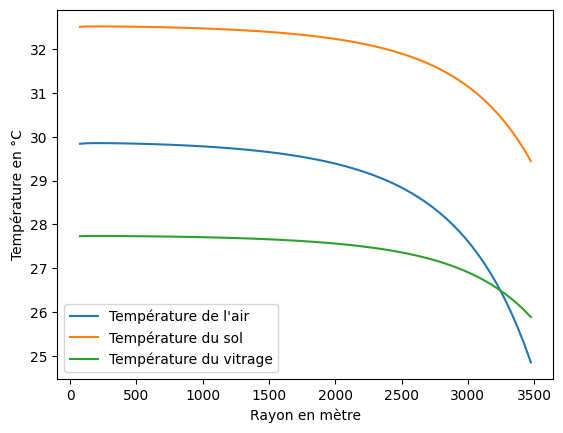

In [14]:
import matplotlib.pyplot as plt

def cp_air(T):
    """
    T: température en Kelvin
    """
    return -0.00000018628*T**3 + 0.00045653*T**2 - 0.1361*T + 1009

def A_air(r):
    """
    Calcule la surface d'une couronne circulaire de largeur 50m
    r: rayon moyen en mètre
    """
    return 3.14*(r + 25)**2 - 3.14*(r - 25)**2

def v_air(r):
    """
    r: rayon en mètre
    """
    return qmmax/(rho*3.14*r*2*Hs)

array_indices = np.arange(0, 69, 1)
array_rayons = 3500 - array_indices*50 - 25

T_air = np.zeros(69)
T_air[0] = Text
T_vitre = np.zeros(69)
T_sol = np.zeros(69)

def equations2(p, i):

    x, z = p   # x = T_sol, y = T_air, z = T_vitre

    eq1 = alpha*phi - hes*(z - Text) - hcv*(z - T_air[i]) - alpha*sigma*(z**4 - x**4)  #Bilan sur le vitrage
    eq2 = tau*phi - hcs*(x - T_air[i]) - sigma*(x**4 - 0.5*alpha*z**4)                 #Bilan sur le sol

    return [eq1, eq2]

for i in range(0, 69):
    T_sol[i], T_vitre[i] = fsolve(equations2, [300, 300], args=(i))
    if i < 68:
        T_air[i+1] = T_air[i] + 1/cp_air(T_air[i])*(-0.5*(v_air(array_rayons[i+1] + 25)**2 - v_air(array_rayons[i] + 25)**2) + 1/qmmax*(hcv*A_air(array_rayons[i])*(T_vitre[i] - T_air[i]) + hcs*A_air(array_rayons[i])*(T_sol[i] - T_air[i])))

plt.plot(array_rayons, T_air - 273.15, label='Température de l\'air')
plt.plot(array_rayons, T_sol - 273.15, label='Température du sol')
plt.plot(array_rayons, T_vitre - 273.15, label='Température du vitrage')
plt.xlabel('Rayon en mètre')
plt.ylabel('Température en °C')
plt.legend()
plt.show()